# Raw example

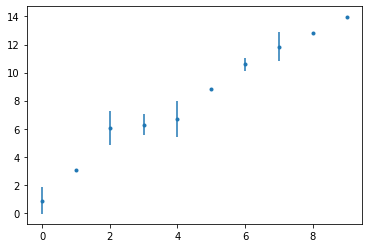

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pymultinest

N_data = 10
noise = np.random.randn(N_data)
data = [np.arange(N_data),1.5*np.arange(N_data)+1.0+noise]
yerr = np.random.randn(N_data)
plt.errorbar(data[0],data[1],yerr=yerr,fmt='.')

x = data[0]
ydata = data[1]

def model(a, b):
    return  a*x+b

# The most important parameters are the two log-probability functions Prior and LogLikelihood.
# They are called by MultiNest.

# Prior should transform the unit cube into the parameter cube. Here is an example for a uniform prior:
def prior(cube, ndim, nparams):
    for i in range(ndim):
        cube[i] = 20*cube[i] - 10 # uniform prior between -10 and 10

# The LogLikelihood function gets this parameter cube and should return the logarithm of the likelihood. 
def loglike(cube, ndim, nparams):
    a, b = cube[0], cube[1]
    ymodel = model(a, b)
    loglikelihood = (-0.5 * ((ymodel - ydata) / yerr)**2).sum()
    return loglikelihood

In [2]:
import os

if not os.path.exists('./chains/'):
    os.makedirs('./chains/')

pymultinest.run(loglike, prior, 2, 
                outputfiles_basename='./chains/test_1_', resume = False, verbose = True)

In [3]:
a = pymultinest.Analyzer(outputfiles_basename='./chains/test_1_', n_params = 2)

  analysing data from ./chains/test_1_.txt


In [4]:
a.get_stats()

{'modes': [{'index': 0,
   'strictly local log-evidence': -18.27115813408445,
   'strictly local log-evidence error': 0.022646961883055934,
   'local log-evidence': -18.27115813408445,
   'local log-evidence error': 0.022646961883055934,
   'mean': [1.7493238066845895, 0.10248311875165507],
   'sigma': [0.04504745515794237, 0.2680266433512868],
   'maximum': [1.7484577478855439, 0.11961966823028902],
   'maximum a posterior': [1.7106721489971388, 0.4570824784731027]}],
 'nested sampling global log-evidence': -18.3574963133958,
 'nested sampling global log-evidence error': 0.1444332288602755,
 'global evidence': -18.27115813408445,
 'global evidence error': 0.022646961883055934,
 'nested importance sampling global log-evidence': -18.27115813408445,
 'nested importance sampling global log-evidence error': 0.022646961883055934,
 'marginals': [{'median': 1.7496648030844604,
   'sigma': 0.04621219271558841,
   '1sigma': [1.7037983434255501, 1.796222728856727],
   '2sigma': [1.65915641053154

In [5]:
a.get_best_fit()

{'log_likelihood': -9.030827507552267,
 'parameters': [1.7484577478855439, 0.11961966823028902]}

In [6]:
# params = a.get_stats()['modes'][0]['mean']
params = a.get_best_fit()['parameters']

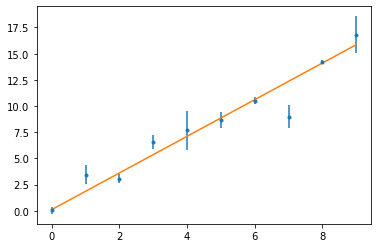

In [7]:
plt.errorbar(data[0],data[1],yerr=yerr,fmt='.')
plt.plot(x,model(params[0],params[1]))

In [8]:
for params in a.get_equal_weighted_posterior():
    print(params)

[  1.6054678    0.47112165 -17.69498021]
[  1.58153772   1.20506477 -17.39036422]
[  1.59605516   0.88120359 -14.7810403 ]
[  1.63518581   0.38382886 -14.65927687]
[  1.74685822   0.57957543 -14.55137785]
[  1.78447256  -0.50285396 -14.07762511]
[  1.61204646   0.87879014 -13.75716394]
[  1.77813277   0.36814066 -13.6171873 ]
[  1.81182652   0.1567441  -13.61009349]
[  1.82093056   0.09221445 -13.57975053]
[  1.62120792   0.62333706 -13.54616397]
[  1.79141999  -0.50552807 -13.50950477]
[  1.61712935   0.73558918 -13.36081188]
[  1.76593765  -0.38563005 -13.35993659]
[  1.65622164   0.29151307 -13.34534358]
[  1.8149481   -0.58299294 -13.30477465]
[  1.71407738  -0.10568732 -13.30212977]
[  1.69484187   0.7511395  -13.21482374]
[  1.8288505   -0.6198727  -13.21026892]
[  1.62053705   0.69723576 -13.20619509]
[  1.81554454   0.10939804 -13.20482648]
[  1.6612112    0.85106722 -13.14384539]
[  1.63331349   0.53433621 -13.03359007]
[  1.71821251  -0.11624814 -13.02181996]
[  1.87539338  -

[ 1.78657724 -0.07401965 -9.38689683]
[ 1.71061211  0.30825704 -9.38616291]
[ 1.71780524  0.33592769 -9.38609089]
[ 1.78626288 -0.06758128 -9.38468401]
[ 1.74222489  0.02604591 -9.38455275]
[ 1.77733176  0.03810356 -9.38391756]
[ 1.73993599  0.03938355 -9.38373148]
[ 1.71850712  0.19238895 -9.38365417]
[ 1.78335605 -0.11708524 -9.38358418]
[ 1.77493177  0.05807758 -9.38330584]
[ 1.74007796  0.2665737  -9.38250131]
[ 1.71133397  0.31846875 -9.38079239]
[ 1.71127201  0.28511568 -9.37965696]
[ 1.74776626e+00 -3.06822533e-03 -9.37840175e+00]
[ 1.78625529 -0.09160101 -9.37833868]
[ 1.72880612  0.11180316 -9.37826211]
[ 1.72211108  0.16259261 -9.37804378]
[ 1.7723621  -0.10339337 -9.37765478]
[ 1.713221    0.25210304 -9.37681804]
[ 1.75928099  0.02030788 -9.08548281]
[ 1.7714192  -0.07329973 -9.26535333]
[ 1.74018981  0.25878041 -9.34078388]
[ 1.74746908  0.05676871 -9.11550103]
[ 1.74746908  0.05676871 -9.11550103]
[ 1.74701826  0.19061981 -9.16922753]
[ 1.73205944  0.19099115 -9.09651416]


In [9]:
p = a.get_equal_weighted_posterior()
p1 = p[:,0]
p2 = p[:,1]

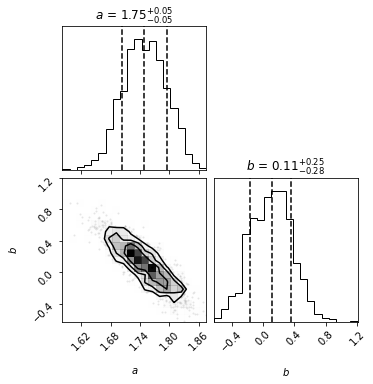

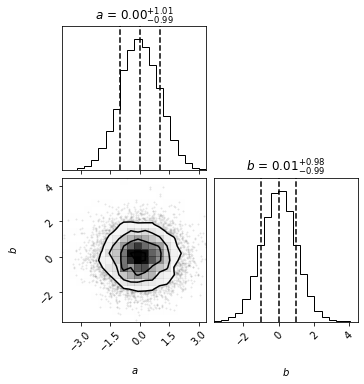

In [10]:
# https://corner.readthedocs.io/en/latest/pages/custom.html

import corner
ndim, nsamples = 2, 10000
np.random.seed(42)
samples = np.random.randn(ndim * nsamples).reshape([nsamples, ndim])
p12 = np.array([p1,p2]).T
figure = corner.corner(p12,labels=[r"$a$", r"$b$"],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12})

figure = corner.corner(samples,labels=[r"$a$", r"$b$"],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12})

# Neat example

  analysing data from ./chains/test_1_.txt


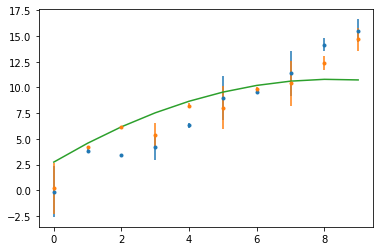

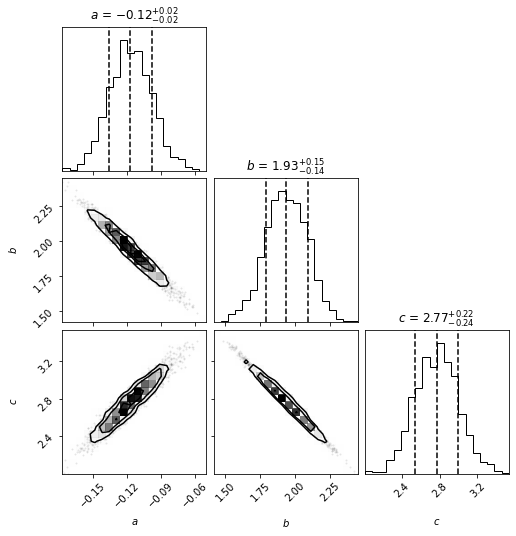

In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pymultinest
import corner

N_data = 10
noise = np.random.randn(N_data)
xdata = np.arange(N_data)
ydata = 1.5*np.arange(N_data)+1.0+noise
yerr = np.random.randn(N_data)
plt.errorbar(data[0],data[1],yerr=yerr,fmt='.')


n_params = 3

def model(a, b, c):
    return  a*xdata**2+b*xdata+c

# The most important parameters are the two log-probability functions Prior and LogLikelihood.
# They are called by MultiNest.

# Prior should transform the unit cube into the parameter cube. Here is an example for a uniform prior:
def prior(cube, ndim, nparams):
    for i in range(ndim):
        cube[i] = 20*cube[i] - 10 # uniform prior between -10 and 10

# The LogLikelihood function gets this parameter cube and should return the logarithm of the likelihood. 
def loglike(cube, ndim, nparams):
    a, b, c = cube[0], cube[1], cube[2]
    ymodel = model(a, b, c)
    loglikelihood = (-0.5 * ((ymodel - ydata) / yerr)**2).sum()
    return loglikelihood



if not os.path.exists('./chains/'):
    os.makedirs('./chains/')

pymultinest.run(loglike, prior, n_params, 
                outputfiles_basename='./chains/test_1_', resume = False, verbose = True)
a = pymultinest.Analyzer(outputfiles_basename='./chains/test_1_', n_params = n_params)
params = a.get_best_fit()['parameters']
plt.errorbar(xdata,ydata,yerr=yerr,fmt='.')
plt.plot(x,model(*params))

p = a.get_equal_weighted_posterior()
p = p[:,0:n_params]
figure = corner.corner(p,labels=[r"$a$", r"$b$", r"$c$"],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12})


# Another neat example

same as Fig. 6-6 in 2019 Numerical Python by R. Johansson

  analysing data from ./chains/test_1_.txt


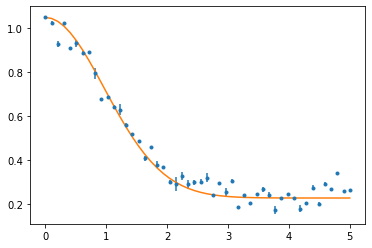

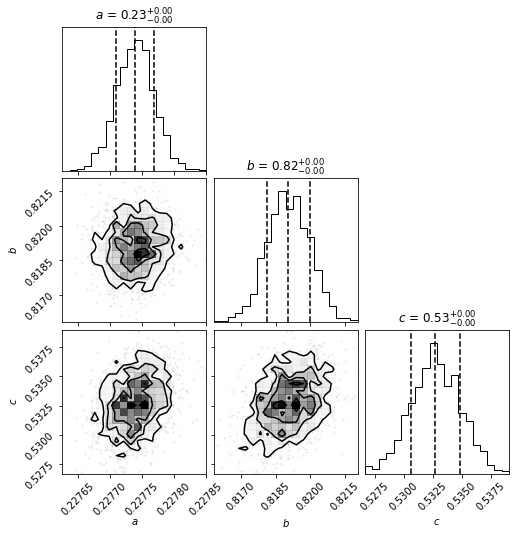

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pymultinest
import corner

beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)
xdata = np.linspace(0, 5, 50)
ydata = f(xdata, *beta) + 0.05 * np.random.randn(len(xdata))
yerr = np.random.randn(len(xdata))*0.01

# *******************
n_params = 3

def model(*b):
    b0, b1, b2 = b
    return  b0 + b1 * np.exp(-b2 * xdata**2)

# The most important parameters are the two log-probability functions Prior and LogLikelihood.
# They are called by MultiNest.

# Prior should transform the unit cube into the parameter cube. Here is an example for a uniform prior:
def prior(cube, ndim, nparams):
    for i in range(ndim):
        cube[i] = cube[i]  # uniform prior between 0 and 1

# The LogLikelihood function gets this parameter cube and should return the logarithm of the likelihood. 
def loglike(cube, ndim, nparams):
    ymodel = model(cube[0],cube[1],cube[2])
    loglikelihood = (-0.5 * ((ymodel - ydata) / yerr)**2).sum()
    return loglikelihood

#*********************

if not os.path.exists('./chains/'):
    os.makedirs('./chains/')

pymultinest.run(loglike, prior, n_params, 
                outputfiles_basename='./chains/test_1_', resume = False, verbose = True)
a = pymultinest.Analyzer(outputfiles_basename='./chains/test_1_', n_params = n_params)
params = a.get_best_fit()['parameters']
plt.errorbar(xdata,ydata,yerr=yerr,fmt='.')
plt.plot(xdata,model(*params))

p = a.get_equal_weighted_posterior()
p = p[:,0:n_params]
figure = corner.corner(p,labels=[r"$a$", r"$b$", r"$c$"],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12})

## The same case using nonlinear LS fit

In [11]:
from scipy import optimize

def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)
def g(beta):
    return ydata - f(xdata, *beta)
beta_start = (1, 1, 1)   
beta_opt, beta_cov = optimize.leastsq(g, beta_start);beta_opt


array([0.24564594, 0.76733204, 0.50924078])